In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [2]:
#defining functions
def Linear_Model(theta0, theta1, x): #Linear function
    return theta0 + theta1 * x


def Objective_Function(m, theta0, theta1):#object function (loss function)
    result = 0
    for i in m:
        result += (Linear_Model(theta0, theta1, i[0]) - i[1])**2
    result /= 2* len(m)
    return result


def Gradient_Descent(m, lr, theta0, theta1): # derivative of loss funciton 
    temp = 0
    for i in m:
        temp += (Linear_Model(theta0, theta1, i[0]) - i[1])
    new_theta0 = theta0 - lr * temp / len(m)
    
    temp = 0
    for i in m:
        temp += (Linear_Model(theta0, theta1, i[0]) - i[1])*i[0]
    new_theta1 = theta1 - lr * temp / len(m)
    
    theta0 = new_theta0
    theta1 = new_theta1 #theta0 and theta1 should be updated simultaneously, after calculation
    
    return theta0, theta1

# Input points & linear regression result

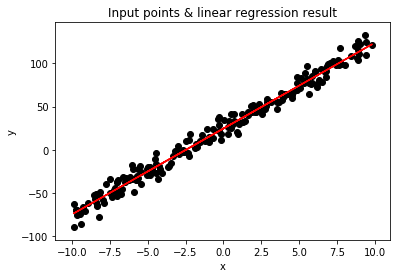

In [3]:
path = "data.csv"
#data loaded from "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

m = []
for i in range(len(x_data)):
    m.append((x_data[i],y_data[i]))
    
lr = 0.01 # let learning rate 0.01
theta0 = random.uniform(1,3) #randomly initializing theta0, theta1 (parameters)
theta1 = random.uniform(1,3)
of_val = [] #object function value
theta = [] #contains theta values during each step

itermax = 1000
itercount = 0
while True: # changing theta values using gradient descent
    
    if itercount >= itermax: #if more than 1000 iter, break the loop
        break
    
    old_theta0, old_theta1 = theta0, theta1
    of_val.append(Objective_Function(m, theta0, theta1))
    theta0, theta1 = Gradient_Descent(m,lr,theta0,theta1)
    theta.append((theta0, theta1))
    
    if len(of_val) > 2 and abs(of_val[-1] - of_val[-2]) < 0.001: #check if the value converges
        break
    
    itercount += 1
    

x = x_data
y = theta0 + theta1 * x

plt.title('Input points & linear regression result')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, c= 'r')
plt.scatter(x_data, y_data, c= 'k') 
plt.show() #input points with linear regression result

In [4]:
print(of_val[-1],theta0,theta1)

27.516664466586118 24.59581772021373 9.929837742971202


# Plot the gradient descent path on the energy surface 

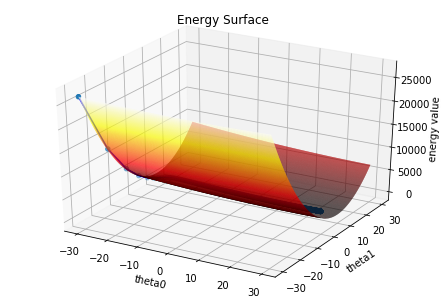

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.path import Path
import matplotlib.patches as patches

theta0 = np.arange(-30,30,0.1) # theta range
theta1 = np.arange(-30,30,0.1)
t0, t1 = np.meshgrid(theta0, theta1)

z =Objective_Function(m,t0,t1)
        
fig = plt.figure()
ax = Axes3D(fig)
ax.set_title("Energy Surface")
ax.plot_surface(t0, t1, z, rstride=1, cstride=1, cmap='hot')
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('energy value')

lr = 0.01 # let learning rate 0.01
theta0 = -30 # theta value initialize to -30, -30
theta1 = -30
of_val = [] #object function value
t0 = [] #contains theta values during each step
t1 = []
itermax = 1000
itercount = 0
while True: # changing theta values using gradient descent
    
    if itercount >= itermax: #if more than 1000 iter, break the loop
        break
    t0.append(theta0)
    t1.append(theta1)
    old_theta0, old_theta1 = theta0, theta1
    of_val.append(Objective_Function(m, theta0, theta1))
    theta0, theta1 = Gradient_Descent(m,lr,theta0,theta1)
   
    if len(of_val) > 2 and abs(of_val[-1] - of_val[-2]) < 0.001: #check if the value converges
        break
    
    itercount += 1

ax.scatter(t0, t1, of_val)     
ax.plot(t0, t1, of_val, color = 'b') #gradient path
plt.show()

In [6]:
print(of_val[-1],t0[-1], t1[-1])

27.516263513751575 24.593980390048824 9.929809450843967


In [7]:
print(itercount)

519
